**Prediction of Heart Disease Using Machine Learning**

The UCI Heart disease dataset is used to develop a K-Nearest Neighbors classifier to predict the likelihood of a patient having a heart disease.



**EDA: Descriptive Statistics**:
As per the source, each patient has the following information collected about them:

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

**Links to Dataset:**

UCI Heart Disease Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease



# **Import, Load, and View Dataset Data**

In [ ]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Load Dataset
df = pd.read_csv("/content/heart[1].csv")

In [ ]:
#View First Few Rows of Dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#View Datatypes
print(df.dtypes)
df.dtypes.value_counts()

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


,count
int64,6
object,5
float64,1


The dataset contains 7 numerical features and 5 categorical. However, two of the numerical features, FastingBS and HeartDisease, are categorical. 0-no and 1-yes.


***Numerical Data***

In [ ]:
# View numerical data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the table above, we can observe the following:
*   The average age of patients is approximately 53 years.
*  The median cholesterol level is about 25 mm/dl higher than its mean, suggesting a left-skewed distribution, possibly due to outliers affecting the data.
*   Both RestingBP and Cholesterol have a minimum value of zero. These values will be checked and cleaned later.

In [ ]:
# Check For Missing Values
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


# **Objective/Categorical Data**


In [ ]:
#View Objective Data
df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


The table shows that there are more males patients sampled. We will plot these variables to get an overall idea of the dataset.

In [ ]:
# Recheck how fastingbs and heartdisease  data is stored
df["FastingBS"].unique(), df["HeartDisease"].unique()

(array([0, 1]), array([0, 1]))

FastingBS 0 if it was <120 and 1 if >120 mg/dl and HeartDisease are stored as 0 for not present and 1 for present.

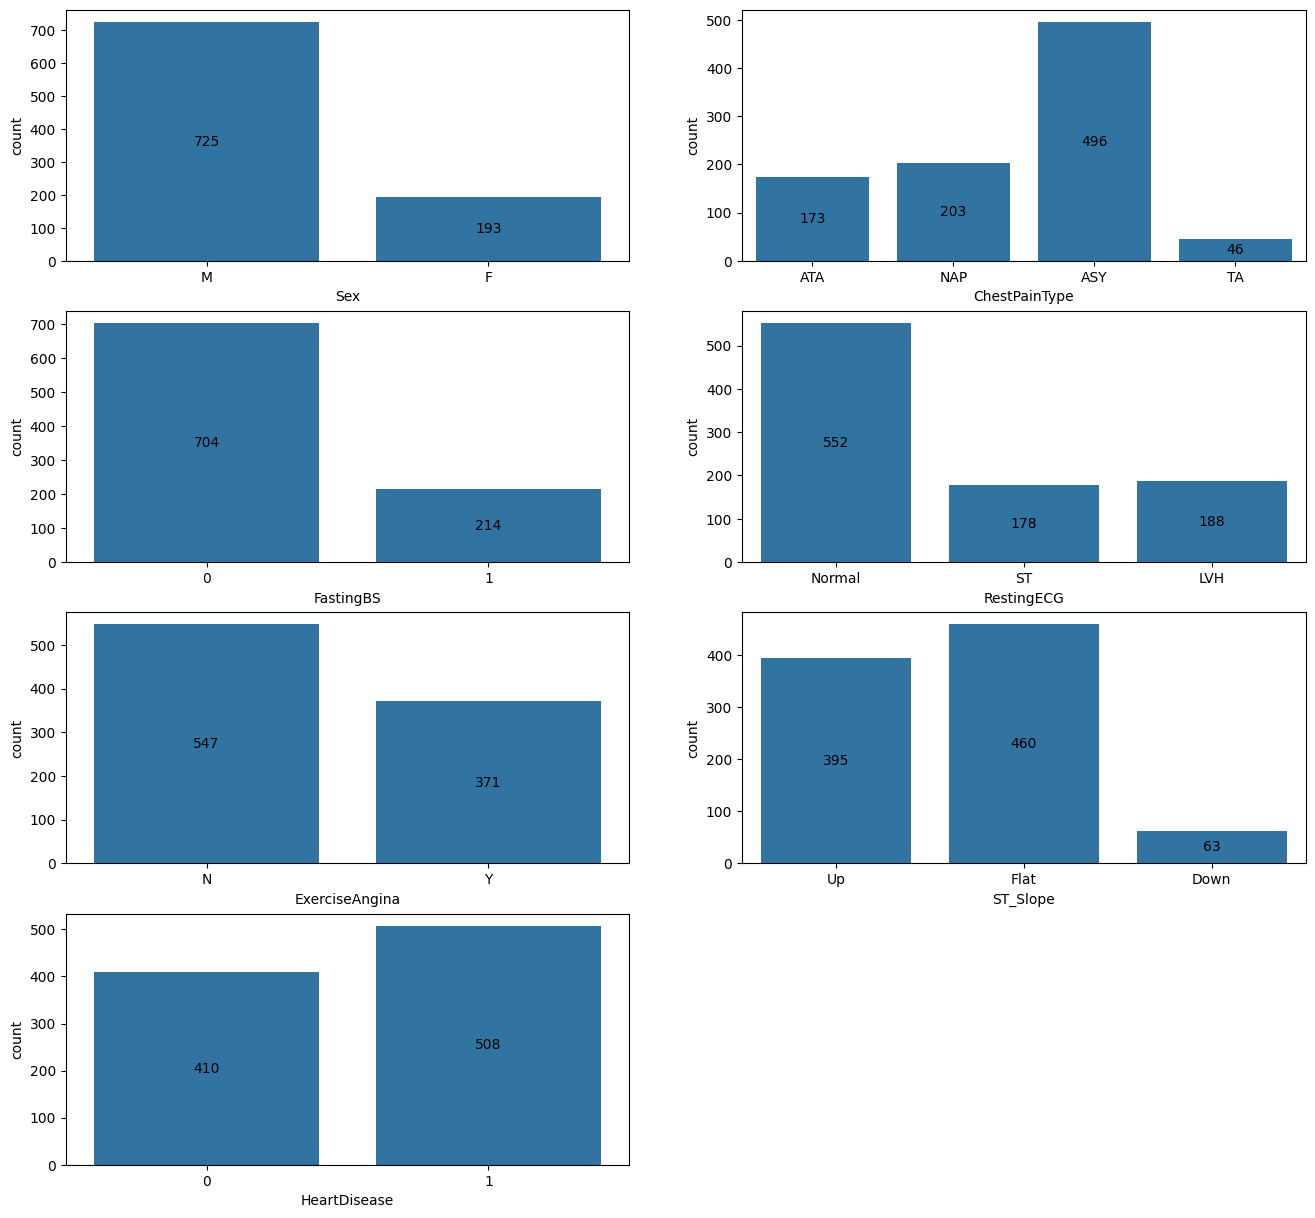

In [ ]:
#Create A plot for the categorical data
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]


fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=df[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

*   Male patients are heavily skewed in the dataset.
*  A significant number of patients diagnosed with heart disease (392) have asymptomatic (ASY) chest pain. ASY suggests that these patients had heart disease without chest pain as a symptom.
* About 77% of the patients tested did not have elevated (>greater than 120 mg/dl) fasting blood sugar (FastingBs).
* Majority of patients tested had a normal RestingECG
*  Majority of patients tested did not have ExerciseAngina
*  Flat slope had the highest result for the ST_Slope peak exercise segment, with an upward slope being close second.
*   There were 94 more patients that were diagnosed with heart disease than people who were not diagnosed with heart disease.

We will see if this result will change when the variables are correlated with the target variable HeartDisease.





# **Data Cleaning**

Resting and cholesterol minimum value should not be zero, explained earlier. We will remove the rows or fill in with median values

In [ ]:
#Identify how many zero values in RestingBP and Cholesterol.
df[df["RestingBP"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
df[df["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


RestingBP has only one zero value and that row will be removed. Cholesterol has 172 zero values. It is too much data to erase. The zeros will be replaced with the median of the non-zero values for patients who were diagnosed with heart disease and the same is done for those who were not diagnosed with heart disease.


In [ ]:
df_clean = df.copy()

# only keep non-zero values for RestingBP
df_clean = df_clean[df_clean["RestingBP"] != 0]

heartdisease_mask = df_clean["HeartDisease"]==0

cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(to_replace = 0, value = cholesterol_without_heartdisease.median())
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(to_replace = 0, value = cholesterol_with_heartdisease.median())

In [ ]:
# Check the data after replacing the zero values with the median
df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


# **Feature Selection: Identify how strongly the features are correlated to the target column.**



In [ ]:
# Convert categorical features to dummy columns
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


<Axes: >

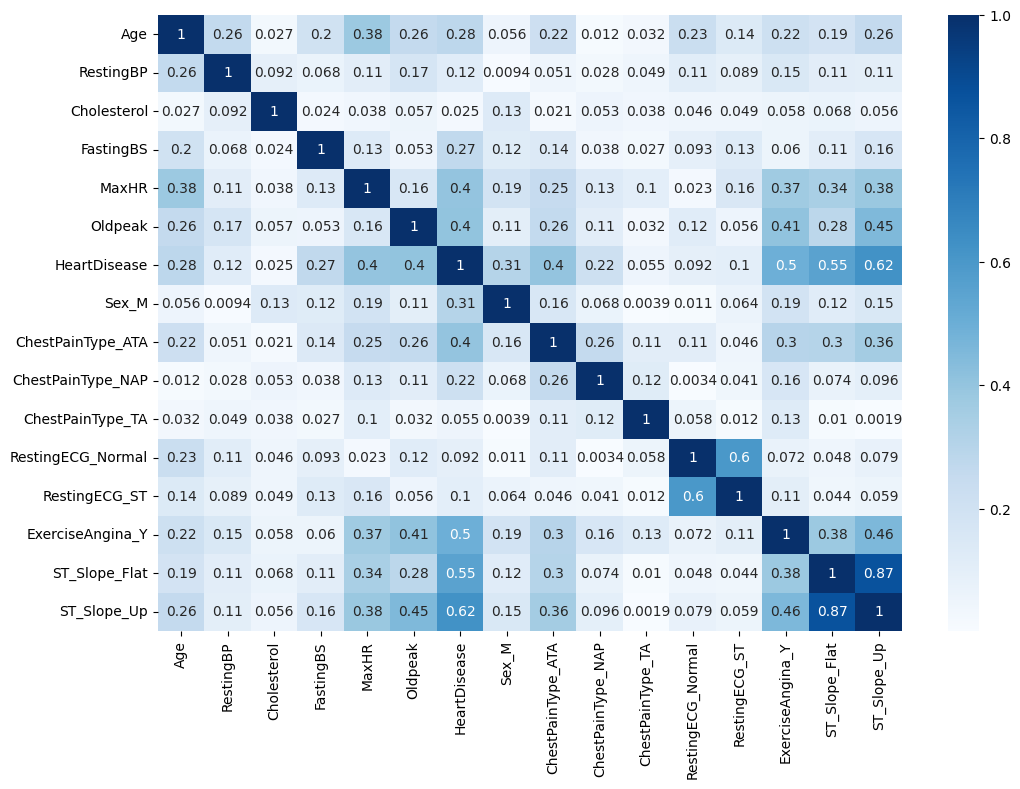

In [ ]:
#Plot heatmap to understand correlation of values with HeartDisease
correlations = abs(df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="Blues")

<Axes: >

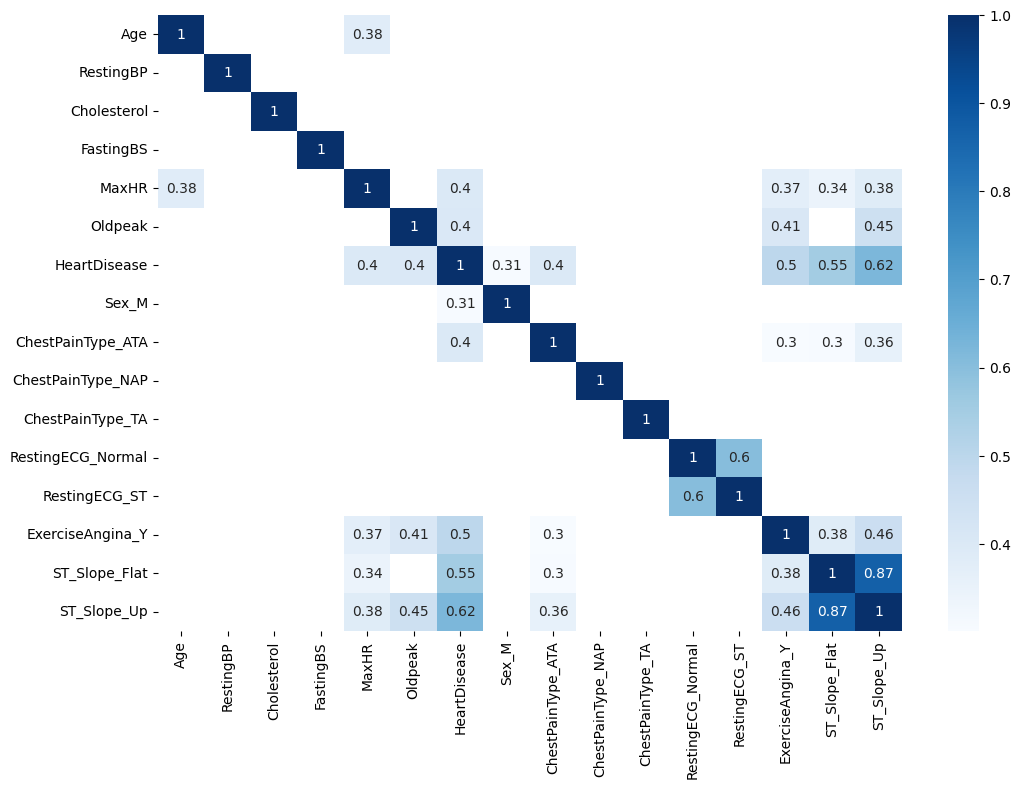

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.3], annot=True, cmap="Blues")

From the correlation heatmap, we can identify the features to be positively correlated to HeartDisease:

    Oldpeak
    MaxHR
    ChestPainType_ATA
    ExerciseAngina_Y
    ST_Slope_Flat
    ST_Slope_Up- with correlation to HD this is actual higher than flat

The features selected based on highest correlation include:

    Sex_M (low coefficient value, but retained due to EDA insights)
    ExerciseAngina_Y
    ST_Slope_Flat
    ST_Slope_Up

Next Step: A Classifier will be build one features at a time to evaluate individual predictive power before combining features. Then we will split our dataset into a training and a test set first.


In [ ]:
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

We will start with creating a model for each of the features above and evaluate their performance using accuracy as a metric.


In [ ]:
for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 44.93%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 84.06%


ST_Slope_Up feature is the best forming model, with an accuracy of ~84%.

Classifier with Multiple Features

First, the data need to be normalized. Scikit-learn's MinMaxScaler is used to scale the values between 0 and 1, and then train the model again.


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 84.78


The model's accuracy increased ~.72%`. That's not a significant improvement.

***Hyperparameter Optimization***


In [ ]:
# Prepare data

X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

Grid search is used to explore the range of values 1 to 20. Minkwoski(default metric) and manhattan are the distance metrics used.

In [ ]:
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [ ]:
knn_grid.best_score_*100, knn_grid.best_params_

(83.30603804797352, {'metric': 'minkowski', 'n_neighbors': 16})

The accuracy of this model is slightly worse. There was a 1.47% decrease, with the best model accuracy of ~83% with 19 n_neighbors and minkowski distance metric.

Since GridSearchCV employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our prior attempt.



Model Evaluation on Test Set

In [ ]:
# normalize test set similar to the scaled training set.

X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 84.78


Our model got an accuracy of ~85%. This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~85% of the time. This accuracy is similar to the Scikit-learn's MinMaxScaler accuracy.



In [ ]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
Sex_M
True     724
False    193
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
Sex_M
True     615
False    164
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
Sex_M
True     109
False     29
Name: count, dtype: int64


We used Sex as one of our features for training the model.

    X had 724 males and 193 females.
    X_train had 615 males and 164 females.
    X_test had 109 males and 29 females.

The dataset shows a significant male predominance compared to females. It was briefly mentioned previously that this imbalance could present a bias and can impact our model. It is understandable that the substanially proportion of males to females for the trained model had better accuracy on the test set. However, there could be other factors influencing this discrepancy
If the test dataset doesn't have that many female patients and the model was trained on a dataset with more male patients, then it is understandable it has better accuracy on the test set. Of course, there could be other factors contributing to this discrepancy.
Summary and Next Steps

Our final model was trained using the following features:

    Oldpeak
    Sex_M
    ExerciseAngina_Y
    ST_Slope_Flat
    ST_Slope_Up

and had a test set accuracy of 86.96%. However, the limitation of the data may have influenced the accuracy of the model performance. In order to get a model with better accuracy we can:

    1.Try different features.
    2.Expand the grid search parameters to identify more optimal hyperparameters.
    3.Explore other algorithms that might perform better than k-NN.
    4.Collect more data.



In [ ]:
#convert to html
!jupyter nbconvert --to html /content/Predictive_Model_for_Heart_Disease_.ipynb


[NbConvertApp] Converting notebook /content/Predictive_Model_for_Heart_Disease_.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 893805 bytes to /content/Predictive_Model_for_Heart_Disease_.html
